<a href="https://colab.research.google.com/github/LuisRios212/IAyRN_Sabatinos/blob/main/PIA_Entrenamiento_de_Red_Neuronal_Artificial_Simple_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Librerias a utilizar**



In [1]:
#TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras

#Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt
import cv2
import glob
import os

print(tf.__version__)

2.12.0


**EJERCICIO 1**

En esta primera parte se probara el dataset generado por nosotros.  Aquí el dataset se divide en 80% para entrenamiento y 20% para prueba.

**Cargar Dataset Equipo**

Una vez importadas las librerias a utilizar, cargaremos nuesto set de datos. Importamos las imagenes desde google drive

El primer paso es crear dos listas, en la primera se guardaran las imagenes y en la segunda las etiquetas.

# **Esta celda solo se debe ejecutar una vez, ya que puede eliminar los elementos almacenados en ella previamene **

In [15]:
# Dataset de equipo
ds_team=[]
ds_team_labels=[]

En el elemento x se copia la ruta donde está guardada la imagen.

In [473]:
# Cargar imagen
x = "/content/drive/MyDrive/Numeros/97.png"
mytest_images=cv2.imread(x, cv2.IMREAD_GRAYSCALE)

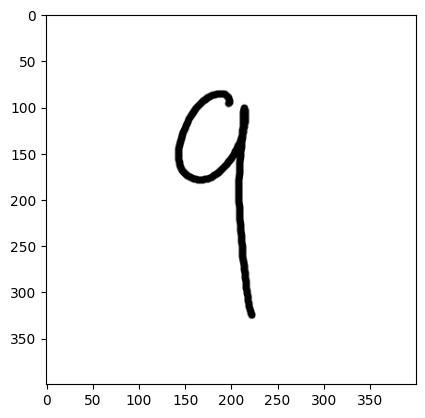

In [474]:
# Vista previa
plt.imshow(mytest_images,cmap="gray")

Una vez importadas las imagenes se redimensionan a 28x28 pixeles y se invierten los colores.

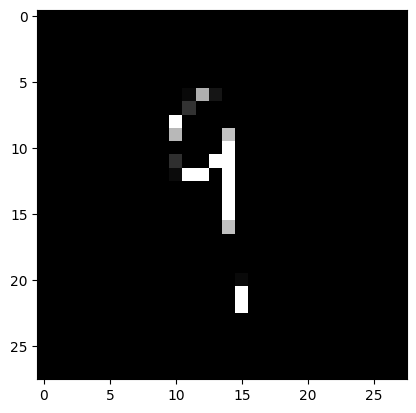

In [475]:
# Formato para imagen
img_resized = cv2.resize(mytest_images,(28,28),interpolation=cv2.INTER_LINEAR)
img_resized = cv2.bitwise_not(img_resized)

# Vista 
plt.imshow(img_resized,cmap='gray')

In [478]:
# En ds_team_labels.append("_") se debera colocar la etiqueta con la que se desea guardar la imagen
ds_team.append(img_resized)
ds_team_labels.append("9")

In [479]:
# Cantidad de imagenes en dataset
len(ds_team)

100

In [480]:
# Etiqueta de la última imagen guardada
ds_team_labels[-1]

'9'

Una vez cargado nuestro dataset compuesto por 400 imagenes. Se divide la lista en dos. Ya que el 70% (380) será utilizada como train_images y el 30% (120) restante como test_images.

In [492]:
from numpy.ma.core import indices
longitud=len(ds_team)
num_primera_parte = int(longitud*0.7)
indices= list(range(longitud))

Crea las dos listas de imagenes

In [493]:
MyTrain_images = [ds_team[i] for i in indices[:num_primera_parte]]
MyTest_images = [ds_team[i] for i in indices[num_primera_parte:]]

In [ ]:
print("MyTrain_images:")
for imagen in MyTrain_images:
  display(imagen)
print("MyTest_images:")
for imagen in MyTest_images:
  display(imagen)

**Pre-Procese el set de datos**

El set de datos debe ser pre-procesado antes de entrenar la red. Si usted inspecciona la primera imagen en el set de entrenamiento va a encontrar que los valores de los pixeles estan entre 0 y 255.

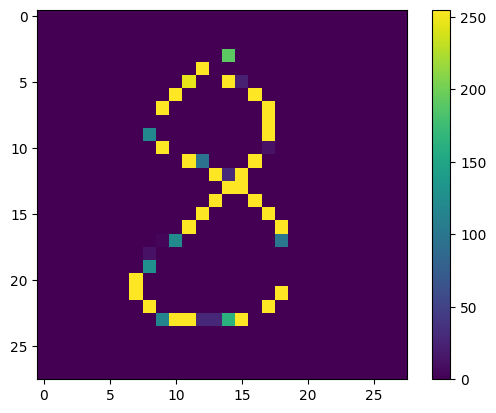

In [503]:
plt.figure()
plt.imshow(ds_team[83])
plt.colorbar()
plt.grid(False)
plt.show()

Escale estos valores en un rango de 0 a 1 antes de alimentarlos al modelo de la red neuronal. Para hacerlo, divida los valores por 255. Es importante que el training set y el testing set se pre-procesen de la misma forma:

In [504]:
datos = np.array(MyTrain_images)/255.0
datos1 = np.array(MyTest_images)/255.0

Para verificar que el set de datos esta en el formato adecuado y que estan listos para construir y entrenar la red, vamos a desplegar las primeras 25 imagenes de el training set y despleguemos el nombre de cada clase debajo de cada imagen.

In [509]:
class_names = ['CERO', 'UNO','DOS','TRES','CUATRO','CINCO','SEIS','SIETE','OCHO','NUEVE']

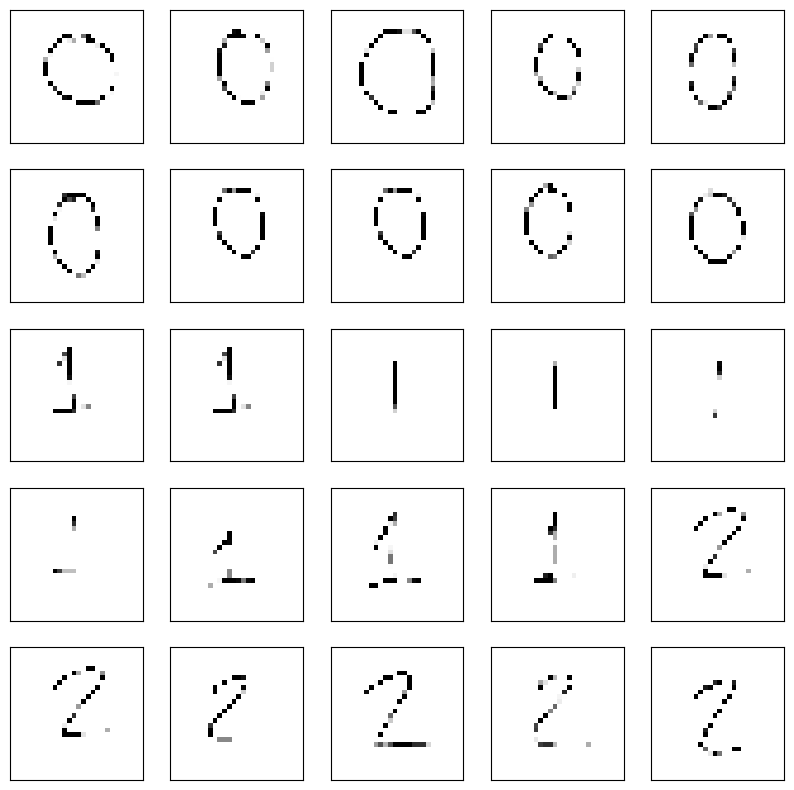

In [513]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(datos[i], cmap=plt.cm.binary)
plt.show()

**Construir modelo**

In [514]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

In [515]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [519]:
model.fit(datos,ds_team_labels, epochs=10)

ValueError: ignored

**Cargar conjunto de datos MNIST**

In [ ]:
digits_mnist = keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels)=digits_mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


Cada imagen es mapeada a una unica etiqueta. Ya que los Class names no están incluidos en  el dataset, alacenelo aca para usarlos luego cuando se visualicen las imagenes:

In [ ]:
class_names = ['CERO', 'UNO','DOS','TRES','CUATRO','CINCO','SEIS','SIETE','OCHO','NUEVE']

**Explore el set de datos**

Explore el formato del set de datos antes de entrenar el modelo. Lo siguiente muestra que hay 60,000 imagenes en el set de entrenamiento, con cada imagen representada por pixeles de 28x28:

In [ ]:
train_images.shape

(60000, 28, 28)

Asimismo, hay 60,000 etiquetas en el set de entrenamiento:

In [ ]:
len(train_labels)

60000

Cada etiqueta es un int entre 0 y 9:

In [ ]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

Hay 10,000 imagenes en el set de pruebas. Otra vez, cada imagen es representada como pixeles de 28x28:

In [ ]:
test_images.shape

(10000, 28, 28)

Y el set de pruebas contiene 10,000 etiquetas de imagen:

In [ ]:
len(test_labels)

10000

**Pre-Procese el set de datos**

El set de datos debe ser pre-procesado antes de entrenar la red. Si usted inspecciona la primera imagen en el set de entrenamiento va a encontrar que los valores de los pixeles estan entre 0 y 255

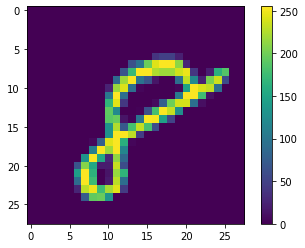

In [ ]:
plt.figure()
plt.imshow(train_images[-1])
plt.colorbar()
plt.grid(False)
plt.show()

Escale estos valores en un rango de 0 a 1 antes de alimentarlos al modelo de la red neuronal. Para hacerlo, divida los valores por 255. Es importante que el training set y el testing set se pre-procesen de la misma forma:

In [ ]:
train_images=train_images/255.0

test_images=test_images/255.0

Para verificar que el set de datos esta en el formato adecuado y que estan listos para construir y entrenar la red, vamos a desplegar las primeras 25 imagenes de el training set y despleguemos el nombre de cada clase debajo de cada imagen.

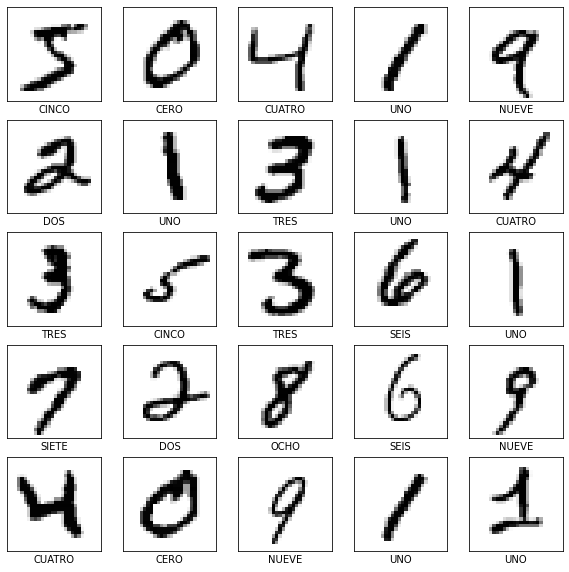

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i],cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

**Construir modelo**

Construir la red neuronal requiere configurar las capas del modelo y luego compilar el modelo.

**Configurar las capas**

Los bloques de construcción basicos de una red neuronal son las capas o layers. Las capas extraen representaciones de el set de datos que se les alimentan. Con suerte, estas representaciones son cosiderables para el problema que estamos solucionando.

La mayoria de aprednizaje profundo consiste de unir capas sencillas. La mayoria de las capas como tf.keras.layers.Dense, tienen parametros que son aprendidos durante el entrenamiento.

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

La primera capa de esta red, tf.keras.layers.Flatten, transforma el formato de las imagenes de un arreglo bi-dimensional (de 28 por 28 pixeles) a un arrelo uni dimensional (de 28*28 pixeles = 784 pixeles), observe esta capa como una capa no apilada de filas de pixeles en la misma imagen y alineandolo. Esta capa no tiene parametros que aprenderm solo reformatea el set de datos.

Despues de que los pixeles esten "aplanados", la secuencia consiste de dos capas tf.keras.layers.Dense. Estas estan densamente conectadas, o completamente conectadas. La primera capa Dense tiene 128 nodos (o neuronas). La segunda (y ultima) capa es una capa de 10 nodos softmax que devuelve un arreglo de 10 posibilidades que suman a 1. Cada nodo contiene una calificación que indica la probabilidad que la actual imagen pertenece a una de las 10 clases.

**Compile el modelo**

Antes de que el modelo este listo para entrenar, se necesitan algunas configuraciones mas. Estas son agregadas durante el paso de compilacion del modelo:

Loss function - Esto mide que tan exacto es el modelo durante el entrenamiento. Quiere minimizar esta funcion para dirigir el modelo en la dirección adecuada.

Optimizer - Esto es como el modelo se actualiza basado en el set de datos que ve y la funcion de perdida.

Metrics - Se usan para monitorear los pasos de entrenamiento y de pruebas. El siguiente ejemplo usa accuracy (exactitud), la fracción de la imagenes que son correctamente clasificadas.

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

**Entrenar el modelo**

Entrenar el modelo de red neuronal requiere de los siguientes pasos: 

1. Entregue los datos de entrenamiento al modelo. En este ejemplo, el set de 
  de datos de entrenamiento estan en los arreglos train_images y train_labes.
2. El modelo aprende a asociar imagenes y etiquetas.
3. Usted le pregunta al modelo que haga predicciones sobre un set de datos que 
  se encuentran en el ejemplo, incluido en el arreglo test_images. Verifique que las preducciones sean iguales a las etiquetas de el arreglo test_labels.



Para comenzar a entrenar, llame el metodo model.fit, es llamado asi por que fin (ajusta) el modelo a el set de datos de entrenamiento:

In [ ]:
model.fit(train_images,train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.2617 - accuracy: 0.9253
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1165 - accuracy: 0.9651
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0806 - accuracy: 0.9758
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0606 - accuracy: 0.9813
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0465 - accuracy: 0.9858
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0373 - accuracy: 0.9882
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0290 - accuracy: 0.9910
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0240 - accuracy: 0.9924
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0190 - accuracy: 0.9943
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0

A medida que el modelo entrena, la perdida y la exactitud son desplegadas. Este modelo alcanza una exactitud de 0.88 sobre el set de datos de entrenamiento.

**Evaluar exactitud**

Siguiente, compare como el rendimiento del modelo sobre el set de datos:

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('\nTest accuracy:',test_acc)

313/313 - 1s - loss: 0.0832 - accuracy: 0.9771 - 674ms/epoch - 2ms/step

Test accuracy: 0.9771000146865845


**Hacer predicciones**

Con el modelo entrenado usted puede usarlo para hacer predicciones sobre imagenes.

In [ ]:
predictions = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


Aca el modelo ha precdecido la etiqueta para cada imagen en el set de datos de test (prueba). Miremos la primera predicción:

In [ ]:
predictions[0]

array([5.2671245e-10, 7.9247664e-10, 9.1819254e-07, 8.0481059e-06,
       1.9163809e-15, 2.7091229e-10, 3.8849629e-18, 9.9999064e-01,
       2.2856665e-07, 3.0046429e-08], dtype=float32)

Una prediccion es un arreglo de 10 numeros. Estos representan el nivel de "confianza" del modelo sobre las imagenes de cada uno de los 10 numeros. Ustedes pueden revisar cual tiene el nivel más alto de confianza:

In [ ]:
np.argmax(predictions[0])

7

Entonces, el modelo tiene mayor confianza que esta imagen es una bota de tobillo "ankle boot" o class_names[9]. Examinando las etiquetas de test o de pruebas muestra que esta clasificación es correcta:

In [ ]:
test_labels[0]

7

Grafique esto para poder ver todo el set de la prediccion de las 10 clases.

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

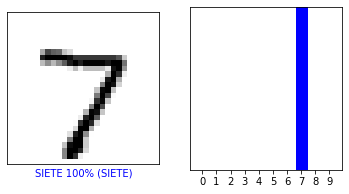

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

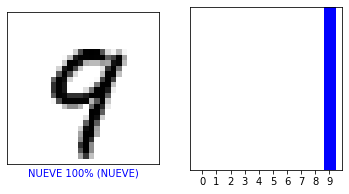

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

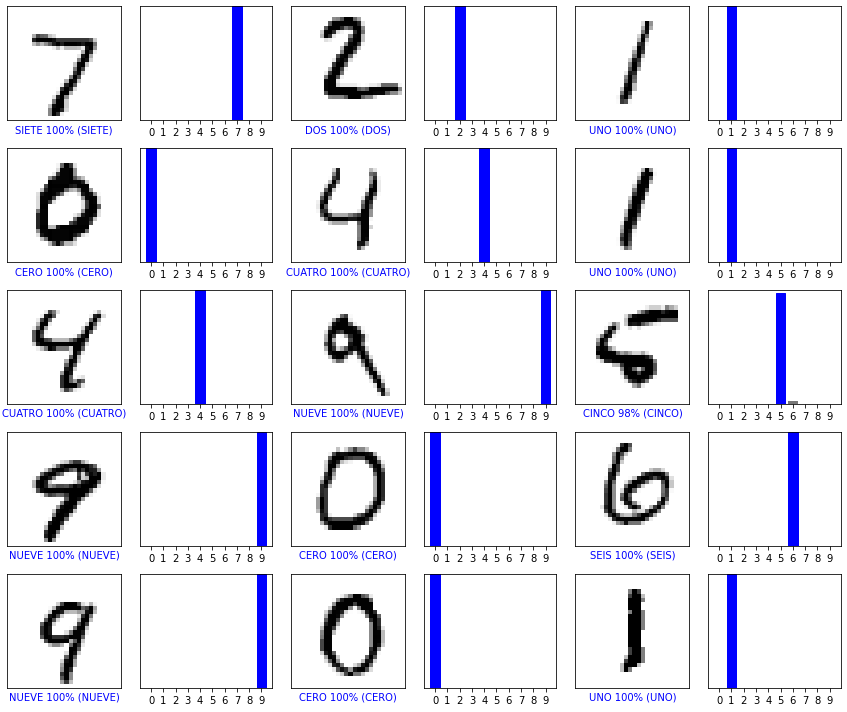

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [ ]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)
